In [1]:
import pymunk
import pymunk.matplotlib_util
from pymunk.vec2d import Vec2d
import os
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

from matplotlib import animation
from IPython.display import HTML

from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection

Loading chipmunk for Windows (64bit) [C:\Users\bcarrion\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\pymunk\chipmunk.dll]


In [7]:
points = np.loadtxt('../GIS/csv/points.csv')

pointshex = np.loadtxt('../GIS/csv/pointshex.csv')
domain = np.loadtxt('../GIS/csv/domain.txt')


In [8]:
radius = 1

In [9]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9.81
    space.damping = 0.99
    return space

In [10]:
def setup_environment(space, points, radius):
    for p in points:
        body = pymunk.Body(body_type = pymunk.Body.STATIC)
        body.position = Vec2d(tuple(p))
        circle = pymunk.Circle(body, radius = radius)
        circle.elasticity = 0.9999999
        space.add(body, circle)

In [11]:
def setup_balls(space, radius, mass):
    moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
    body = pymunk.Body(mass, moment)
    body.position = np.random.rand(2) + np.array([0, 2])
    body.start_position = Vec2d(body.position)
    shape = pymunk.Circle(body, radius)
    shape.elasticity = 0.9999999
    space.add(body, shape)   
    

In [14]:
def setup_domain(space, polygon):

#     verts   = df.loc[df.pol == p, ['x', 'y']].values
    vv      = []
    for v in polygon:
        vv.append((v[0], v[1]))

    dominio = pymunk.Body(body_type = pymunk.Body.STATIC)
    poly = pymunk.Poly(dominio, vv)
    
    space.add(dominio, poly)   
    

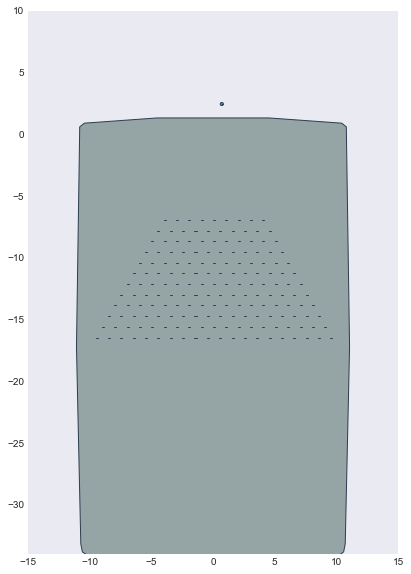

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.set_xlim(-15, 15)
ax.set_ylim(-34, 10)
ax.set_aspect("equal")

space = setup_space()
setup_environment(space, points, radius/6)
setup_balls(space, radius/8, 10)

setup_domain(space, domain)

o = pymunk.matplotlib_util.DrawOptions(ax)
space.debug_draw(o)

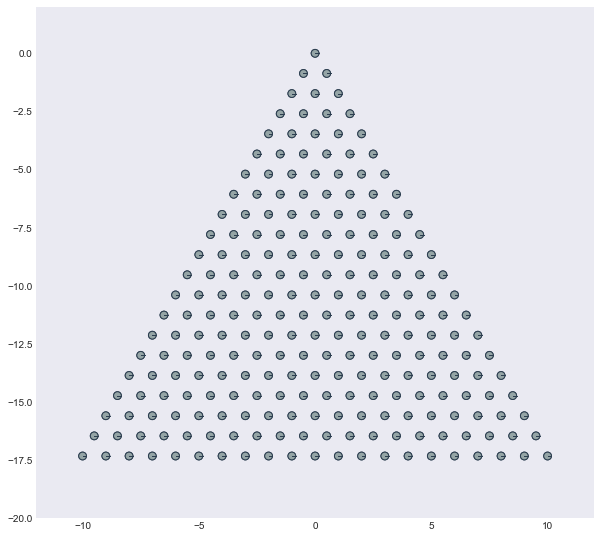

In [11]:
   
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    ax.set_xlim(-12, 12)
    ax.set_ylim(-20, 2)
    ax.set_aspect("equal")
    space.debug_draw(o)
    return []

frames = 505
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())

## pymunk animation example

In [4]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
# ax = plt.axes()
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)
#space.debug_draw(o)

space.shapes[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())